In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory



# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## **IMPORT MODULES**

In [2]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

## **LOAD DATASET**

In [3]:
paths = []
labels = []
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
    if len(paths) == 2800:
        break
print('Dataset is Loaded')

Dataset is Loaded


In [4]:
paths[:5]

['/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_home_fear.wav',
 '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_youth_fear.wav',
 '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_near_fear.wav',
 '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_search_fear.wav',
 '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_pick_fear.wav']

In [5]:
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

,speech,label
0,/kaggle/input/toronto-emotional-speech-set-tes...,fear
1,/kaggle/input/toronto-emotional-speech-set-tes...,fear
2,/kaggle/input/toronto-emotional-speech-set-tes...,fear
3,/kaggle/input/toronto-emotional-speech-set-tes...,fear
4,/kaggle/input/toronto-emotional-speech-set-tes...,fear


In [6]:
print(df['label'].value_counts())
print(df['speech'].value_counts())

fear       400
angry      400
disgust    400
neutral    400
sad        400
ps         400
happy      400
Name: label, dtype: int64
/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_home_fear.wav                1
/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/OAF_Pleasant_surprise/OAF_shirt_ps.wav    1
/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/OAF_Pleasant_surprise/OAF_loaf_ps.wav     1
/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/OAF_Pleasant_surprise/OAF_fail_ps.wav     1
/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/OAF_Pleasant_surprise/OAF_mess_ps.wav     1
                                                                                                                                ..
/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set d

## **Exploratory Data Analysis**

<AxesSubplot:xlabel='label', ylabel='count'>

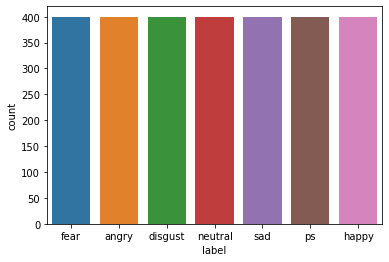

In [7]:
sns.countplot(df['label'])

In [8]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

In [9]:
def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

In [10]:
emotion = 'fear'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)

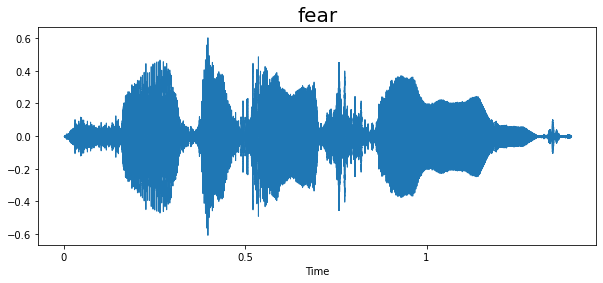

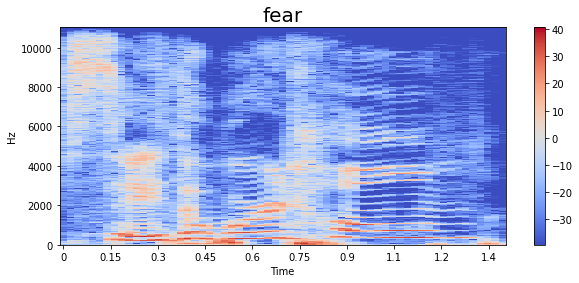

In [11]:
waveplot(data, sampling_rate, emotion)

spectogram(data, sampling_rate, emotion)

Audio(path)

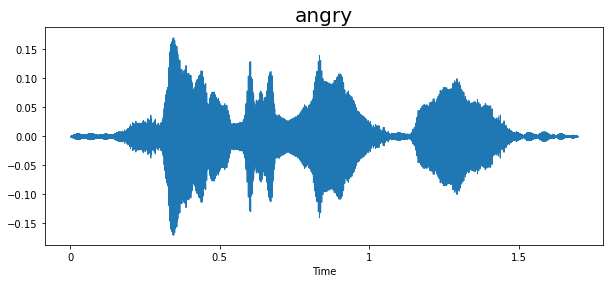

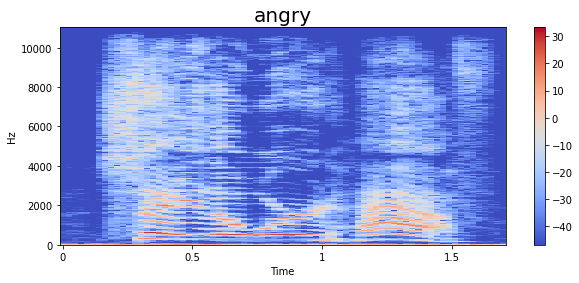

In [12]:
emotion = 'angry'
path = np.array(df['speech'][df['label']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

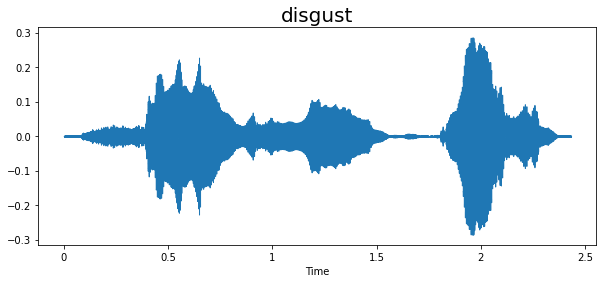

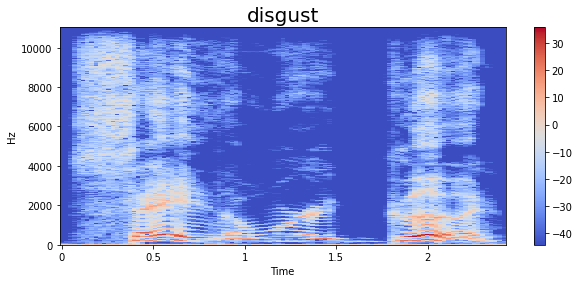

In [13]:
emotion = 'disgust'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

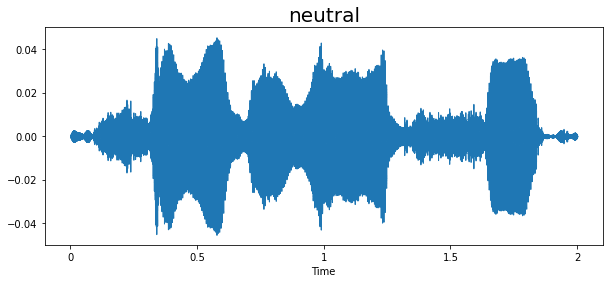

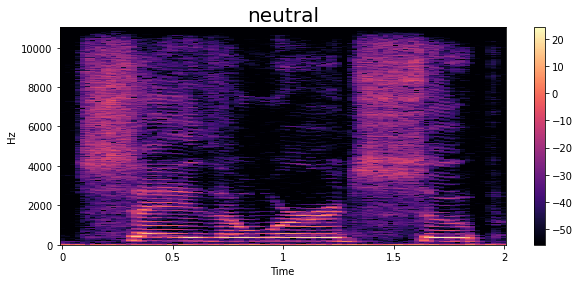

In [14]:
emotion = 'neutral'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

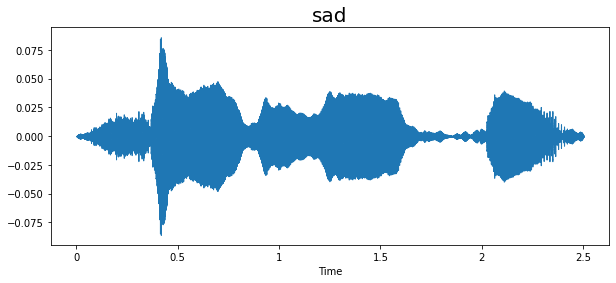

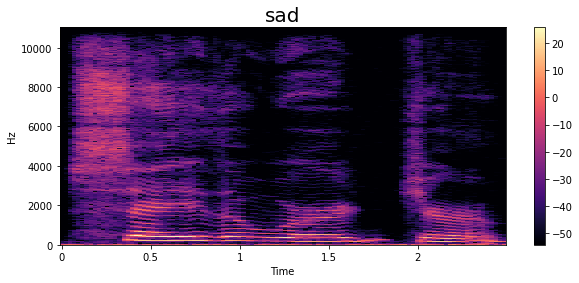

In [15]:
emotion = 'sad'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

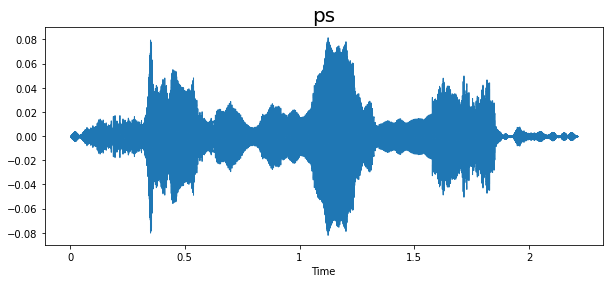

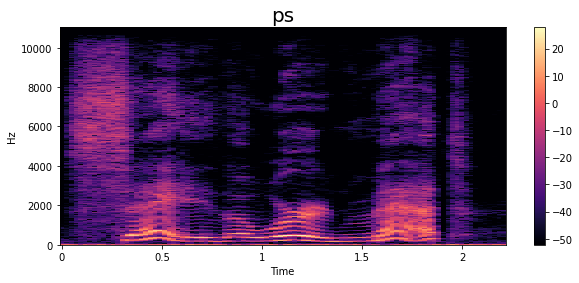

In [16]:
emotion = 'ps'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

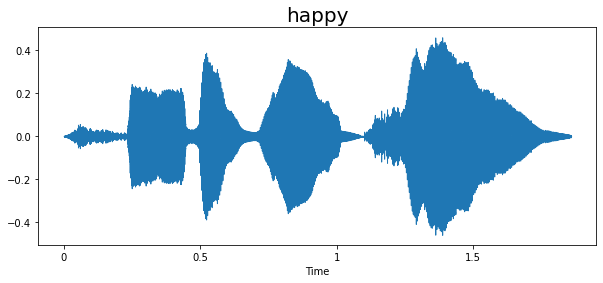

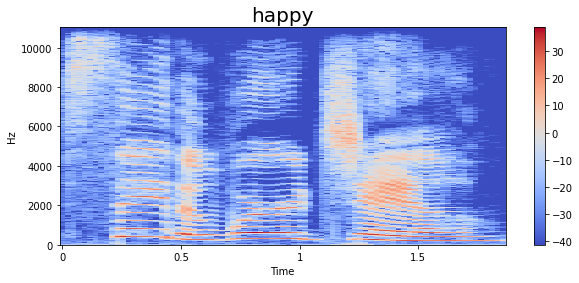

In [17]:
emotion = 'happy'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)


## **Feature Extraction**

In [18]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [19]:
extract_mfcc(df['speech'][0])


array([-286.02707   ,   86.23414   ,   -2.635008  ,   22.56944   ,
        -15.209238  ,   11.531056  ,   11.94983   ,   -2.564069  ,
          0.63499844,   11.539477  ,  -17.85487   ,   -7.673546  ,
          6.1565228 ,   -3.800448  ,   -9.552902  ,    3.9220483 ,
        -13.588675  ,   14.449348  ,   19.31697   ,   23.08124   ,
         32.217903  ,   16.650953  ,   -4.1388583 ,    1.2018498 ,
        -11.535383  ,    6.9179306 ,   -2.840763  ,   -7.467058  ,
        -11.169154  ,   -2.1890633 ,   -5.489987  ,    4.463149  ,
        -11.367347  ,   -8.866391  ,   -3.8222969 ,    5.000417  ,
         -1.7143743 ,    2.664231  ,   11.361882  ,   11.313575  ],
      dtype=float32)

In [20]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))

In [21]:
X_mfcc

0       [-286.02707, 86.23414, -2.635008, 22.56944, -1...
1       [-348.7427, 35.7786, -4.4302225, 15.252253, 5....
2       [-340.4982, 54.36257, -14.845928, 21.453777, 8...
3       [-307.126, 21.987495, -5.1469626, 7.2266827, -...
4       [-345.27826, 47.107338, -24.942877, 20.17883, ...
                              ...                        
2795    [-374.88943, 61.58835, -0.70487076, 9.159214, ...
2796    [-314.5199, 40.65166, -6.461393, -3.0599391, -...
2797    [-358.06696, 78.64016, -15.999416, 2.9611568, ...
2798    [-353.46466, 102.151054, -14.645692, -11.56419...
2799    [-389.82825, 54.579174, 0.807547, -0.8762021, ...
Name: speech, Length: 2800, dtype: object

In [22]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(2800, 40)

In [23]:
## input split
X = np.expand_dims(X, -1)
X.shape

(2800, 40, 1)

In [24]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])

In [25]:
y = y.toarray()
y.shape

(2800, 7)

In [26]:
y.shape

(2800, 7)

## **Create the LSTM Model**

In [27]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential([
    LSTM(256, return_sequences=False, input_shape=(40,1)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

2022-10-07 18:17:52.756387: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 256)               264192    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               32896     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 7)                 4

In [28]:
# Train the model
history = model.fit(X, y, validation_split=0.2, epochs=50, batch_size=64)

Epoch 1/50


2022-10-07 18:17:53.576834: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


35/35 [==============================] - 7s 131ms/step - loss: 1.0637 - accuracy: 0.6237 - val_loss: 2.5111 - val_accuracy: 0.1768
Epoch 2/50
35/35 [==============================] - 4s 111ms/step - loss: 0.4148 - accuracy: 0.8625 - val_loss: 2.0036 - val_accuracy: 0.2946
Epoch 3/50
35/35 [==============================] - 4s 109ms/step - loss: 0.2097 - accuracy: 0.9353 - val_loss: 1.7316 - val_accuracy: 0.5321
Epoch 4/50
35/35 [==============================] - 4s 109ms/step - loss: 0.1800 - accuracy: 0.9424 - val_loss: 1.5261 - val_accuracy: 0.5875
Epoch 5/50
35/35 [==============================] - 4s 111ms/step - loss: 0.1578 - accuracy: 0.9473 - val_loss: 2.0550 - val_accuracy: 0.5982
Epoch 6/50
35/35 [==============================] - 4s 108ms/step - loss: 0.1715 - accuracy: 0.9496 - val_loss: 1.9595 - val_accuracy: 0.4500
Epoch 7/50
35/35 [==============================] - 5s 134ms/step - loss: 0.1276 - accuracy: 0.9656 - val_loss: 2.5668 - val_accuracy: 0.3964
Epoch 8/50
35/35 

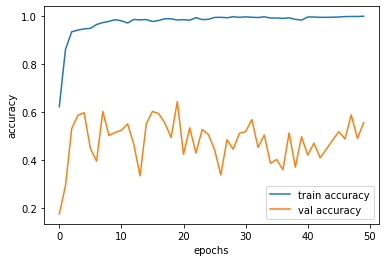

In [29]:
epochs = list(range(50))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

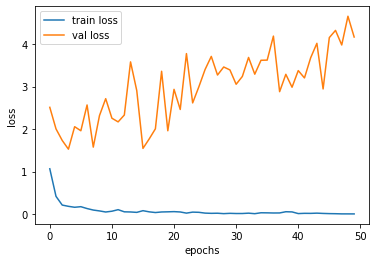

In [30]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()